### Import Libraries & Global Constants

In [3]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
# Seed for reproducibility
SEED = 42

### Load Data

In [4]:
# Load the data from the CSV file
listings = pd.read_csv('../data/listings.csv')

# Exploratory Data Analysis

In [5]:
# Block for testing stuff

listings["room_type"].unique()

# Count the values of each of the room types
listings["room_type"].value_counts()


room_type
Entire home/apt    8747
Private room       1305
Shared room          46
Hotel room            1
Name: count, dtype: int64

## Data cleaning



In [6]:
def remove_columns(df, columns_to_remove):
    existing_columns = [col for col in columns_to_remove if col in df.columns]
    return df.drop(columns=existing_columns)

def clean_price(df):
    # First check that price is not already a numeric value
    if df['price'].dtype == np.float64:
        return df
    df_copy = df.copy()
    # Remove the commas and dollar signs from the price column
    df_copy['price'] = df_copy['price'].str.replace("$", "").str.replace(",", "").astype(float)
    return df_copy


def fill_missing_values(df):
    df_copy = df.copy()
    #If type is numeric, fill with mean
    for col in df_copy.select_dtypes(include='number').columns:
        df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
    # Otherwise, if type is anything else, delete row
    df_copy = df_copy.dropna()

    return df_copy

def convert_boolean_columns(df):
    # Convert boolean columns to 0 and 1
    boolean_columns = df.select_dtypes(include='bool').columns
    df_copy = df.copy()
    for col in boolean_columns:
        df_copy[col] = df_copy[col].astype(int)

    # Needed since boolean data is inconsistent
    for col in df.columns:
        if set(df[col].unique()) == {'f', 't'}:
            df_copy[col] = df_copy[col].replace({'f': 0, 't': 1})
    return df_copy


def one_hot_encode_room_type(df):
    # One hot encode the room_type column
    # First check that the room_type column exists
    if 'room_type' not in df.columns:
        return df
    df_copy = pd.get_dummies(df, columns=['room_type'])
    return df_copy

In [7]:
columns_to_remove = [
 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
 'description', 'neighborhood_overview', 'picture_url', 'host_id', 
 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 
 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 
 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'bathrooms_text', 
 'amenities', 'minimum_minimum_nights', 'maximum_minimum_nights', 
 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 
 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 
 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 
 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 
 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
 'review_scores_value', 'license', 'host_verifications', 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms', 'host_total_listings_count'

]

listings_clean = remove_columns(listings, columns_to_remove)
listings_clean = fill_missing_values(listings_clean)
listings_clean = clean_price(listings_clean)
listings_clean = one_hot_encode_room_type(listings_clean)
listings_clean = convert_boolean_columns(listings_clean)


# Assert all values are numeric
assert listings_clean.dtypes.all() != np.dtype('O'), 'Not all values are numeric'


/var/folders/g3/2wc_x03s0fv00j7h4xdv15y80000gn/T/ipykernel_23928/223574813.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[col] = df_copy[col].replace({'f': 0, 't': 1})


In [8]:
listings_clean.head(10)

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,review_scores_rating,instant_bookable,reviews_per_month,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,2,59.91201,10.72455,3,1.0,2.0,3.0,3400.0,4,1000,1,4.90,0,0.39,1,0,0
1,0,1,59.90795,10.77987,2,1.0,1.0,2.0,572.0,14,730,1,4.75,0,0.34,0,1,0
2,1,3,59.91074,10.77232,4,1.0,2.0,3.0,1929.0,3,21,1,4.77,0,0.50,1,0,0
3,1,3,59.91253,10.77205,2,1.0,1.0,2.0,736.0,1,40,1,4.82,0,1.48,0,1,0
4,0,2,59.92398,10.74787,2,1.0,1.0,1.0,1029.0,5,365,1,4.90,0,0.27,0,1,0
5,0,1,59.93750,10.76554,2,1.0,1.0,1.0,600.0,2,30,1,4.90,1,0.13,0,1,0
6,0,2,59.93024,10.75964,6,1.0,5.0,3.0,9494.0,100,365,1,4.87,1,0.22,1,0,0
7,1,2,59.84704,10.77780,6,1.0,2.0,3.0,1076.0,1,365,1,4.96,0,2.71,1,0,0
8,1,1,59.93061,10.75375,2,1.0,1.0,1.0,1053.0,13,1125,1,4.86,0,0.14,1,0,0
10,1,3,59.92085,10.74995,1,1.5,1.0,1.0,571.0,5,365,1,4.79,0,0.84,0,1,0


In [9]:
listings_clean.dtypes

host_is_superhost              int64
host_listings_count            int64
latitude                     float64
longitude                    float64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
price                        float64
minimum_nights                 int64
maximum_nights                 int64
has_availability               int64
review_scores_rating         float64
instant_bookable               int64
reviews_per_month            float64
room_type_Entire home/apt      int64
room_type_Private room         int64
room_type_Shared room          int64
dtype: object

In [10]:
print("Rows before cleaning",len(listings))
print("Number of columns before cleaning",len(listings.columns))
print("Rows after cleaning",len(listings_clean))
print("Number of columns after cleaning",len(listings_clean.columns))

Rows before cleaning 10099
Number of columns before cleaning 75
Rows after cleaning 8416
Number of columns after cleaning 18


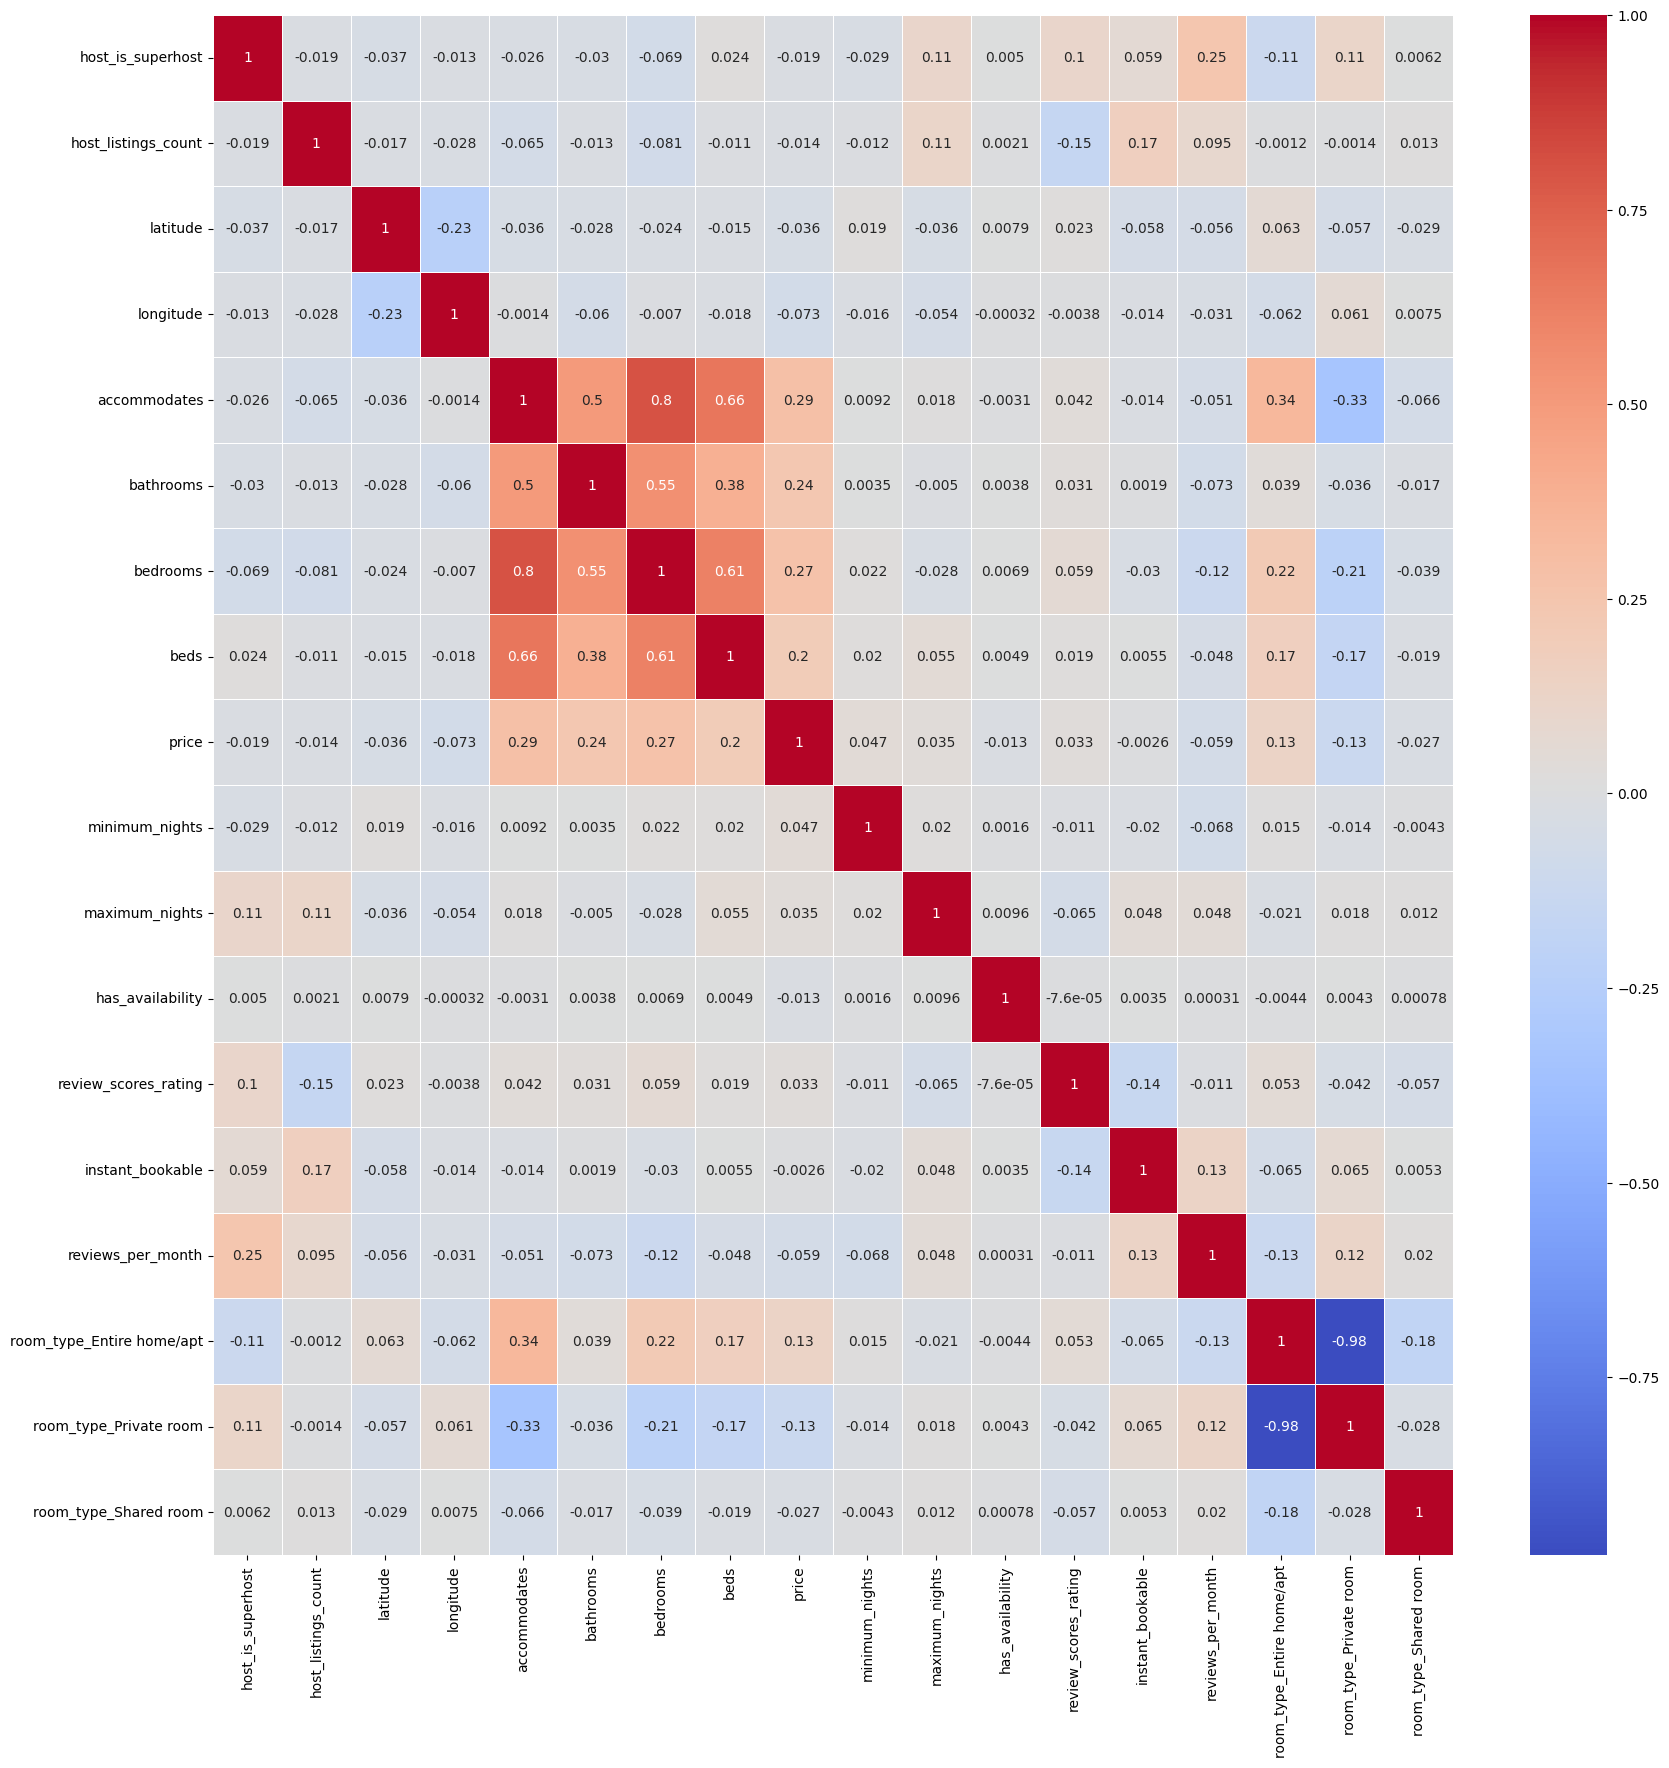

In [11]:
# Plot the correlation matrix
corr = listings_clean.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


This means removing 
- host_total_listings_count


# Quick modelling

In [12]:
# Split the data into features and target
X = listings_clean.drop(columns='price')
y = listings_clean['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


In [13]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2:", model.score(X_test, y_test))


Coefficients: [ 8.56044154e+00  1.02260370e+00 -5.22601817e+03 -4.08865879e+03
  1.99238928e+02  7.45711831e+02  1.67883193e+02 -2.05006396e+01
  7.96838150e+00  2.23531156e-01 -2.90166068e+03  1.92946103e+02
  3.94006973e+01 -5.61412206e+01  2.95399766e+02 -6.53247963e+01
 -2.30074970e+02]
Intercept: 358759.10708041774
R^2: 0.2975822298519032
